In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

# Exploratory Data Analysis

In [2]:
df = pd.read_csv('movie_metadata.csv')
print(df.shape)
df.head()

(5043, 28)


,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 28 columns):
color                        5024 non-null object
director_name                4939 non-null object
num_critic_for_reviews       4993 non-null float64
duration                     5028 non-null float64
director_facebook_likes      4939 non-null float64
actor_3_facebook_likes       5020 non-null float64
actor_2_name                 5030 non-null object
actor_1_facebook_likes       5036 non-null float64
gross                        4159 non-null float64
genres                       5043 non-null object
actor_1_name                 5036 non-null object
movie_title                  5043 non-null object
num_voted_users              5043 non-null int64
cast_total_facebook_likes    5043 non-null int64
actor_3_name                 5020 non-null object
facenumber_in_poster         5030 non-null float64
plot_keywords                4890 non-null object
movie_imdb_link              5043 non-

Columns are not well arranged, but this doesn't affect ML model performance.

In [4]:
df.isnull().sum()

color                         19
director_name                104
num_critic_for_reviews        50
duration                      15
director_facebook_likes      104
actor_3_facebook_likes        23
actor_2_name                  13
actor_1_facebook_likes         7
gross                        884
genres                         0
actor_1_name                   7
movie_title                    0
num_voted_users                0
cast_total_facebook_likes      0
actor_3_name                  23
facenumber_in_poster          13
plot_keywords                153
movie_imdb_link                0
num_user_for_reviews          21
language                      12
country                        5
content_rating               303
budget                       492
title_year                   108
actor_2_facebook_likes        13
imdb_score                     0
aspect_ratio                 329
movie_facebook_likes           0
dtype: int64

Data is heavily missing in columns `gross`, `budget` and `content_rating`, among others. We can remove rows with missing data if the whole dataset is big, but in this case I would keep them all.

In [5]:
# get numeric cols
df_num = df.select_dtypes(include=['int64', 'float64'])
df_num.columns

Index(['num_critic_for_reviews', 'duration', 'director_facebook_likes',
       'actor_3_facebook_likes', 'actor_1_facebook_likes', 'gross',
       'num_voted_users', 'cast_total_facebook_likes', 'facenumber_in_poster',
       'num_user_for_reviews', 'budget', 'title_year',
       'actor_2_facebook_likes', 'imdb_score', 'aspect_ratio',
       'movie_facebook_likes'],
      dtype='object')

C:\Users\bichn\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)
C:\Users\bichn\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\bichn\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


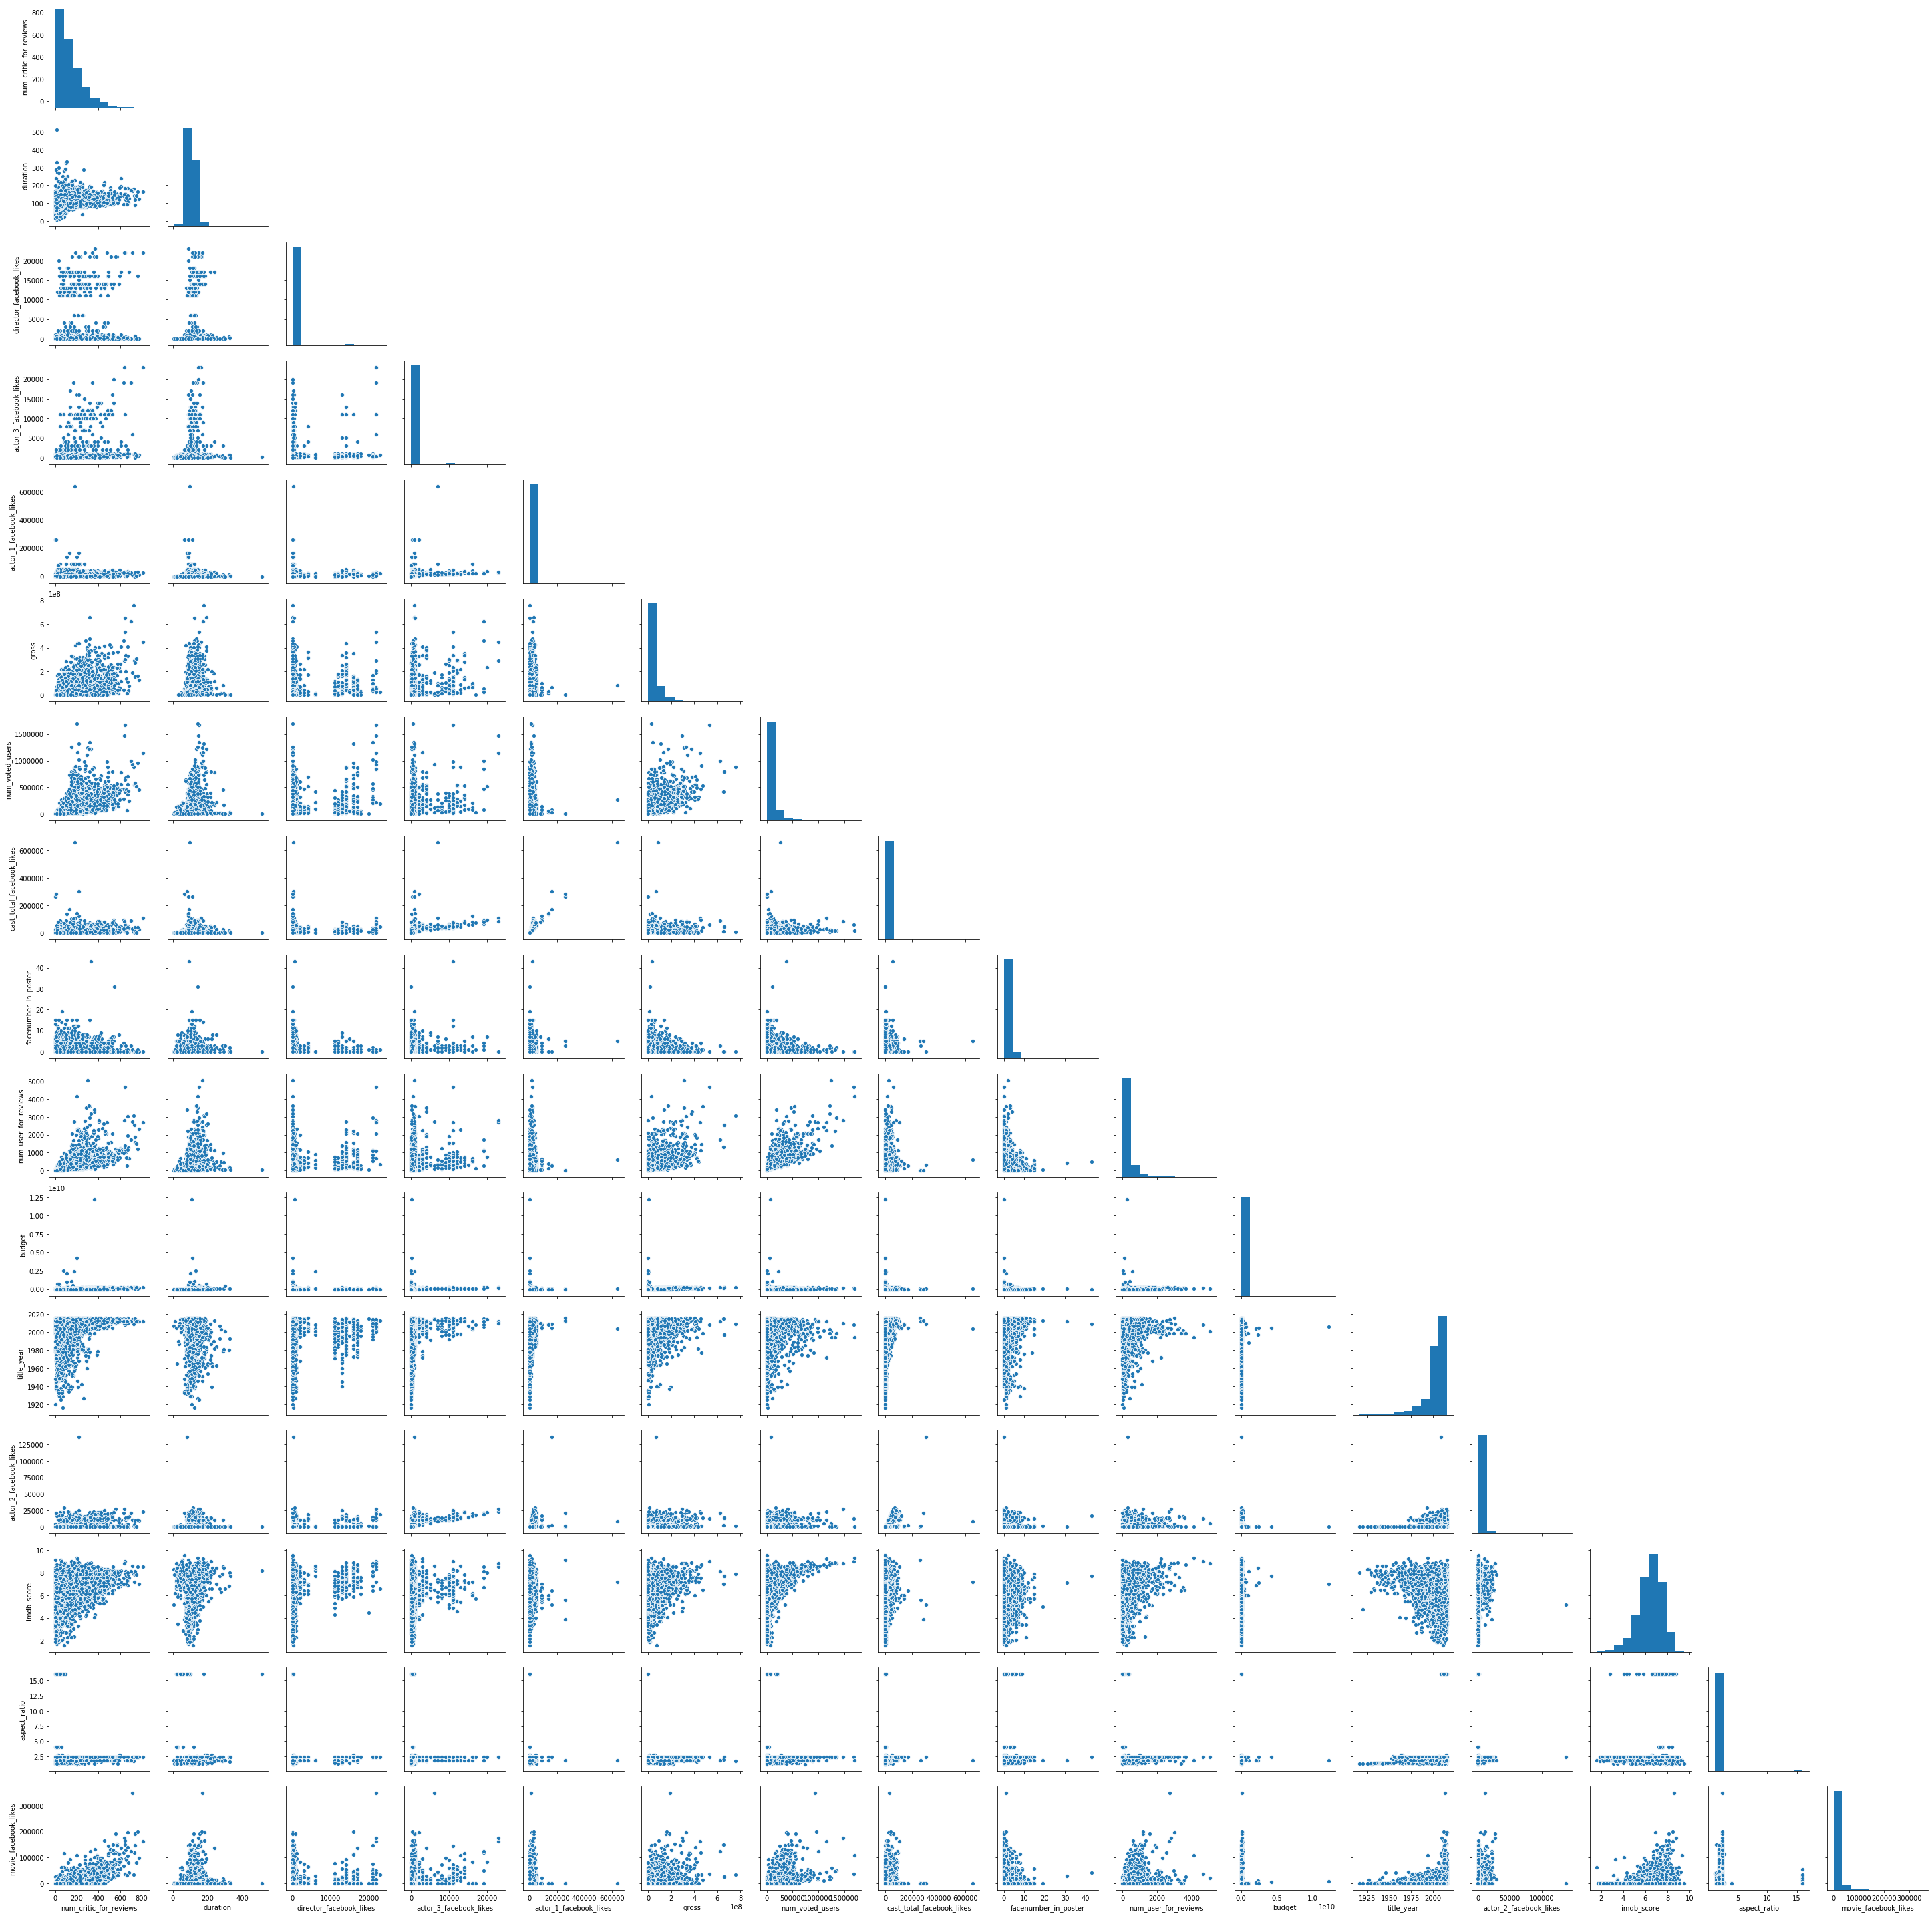

In [6]:
# pairgrid 
g = sns.pairplot(df_num, size = 2.5)
for i, j in zip(*np.triu_indices_from(g.axes, 1)):
    g.axes[i, j].set_visible(False)

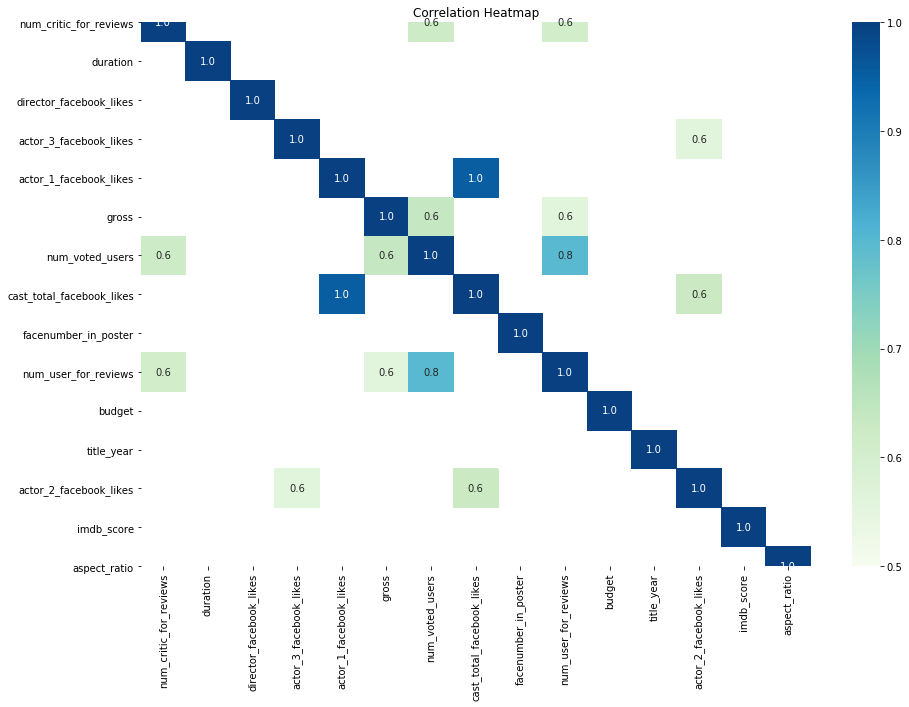

In [7]:
# create correlation matrix from train data excluding `SalePrice`
corr_mat = df.iloc[:, :-1].corr()

# select correlations greater than 0.5
high_corr_mat = corr_mat[abs(corr_mat) >= 0.5]

# plot correlation heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(high_corr_mat,
            annot=True,
            fmt='.1f',
            cmap='GnBu',
            vmin=0.5,
            vmax=1)
title = plt.title('Correlation Heatmap')

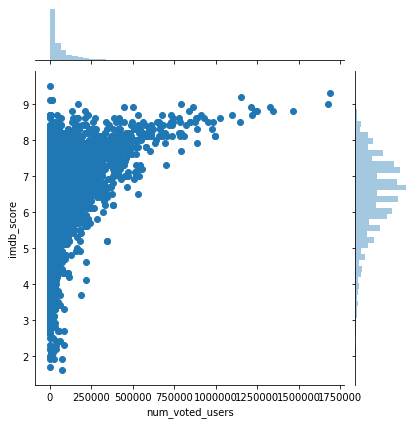

In [8]:
sns.jointplot(df.num_voted_users, df.imdb_score)

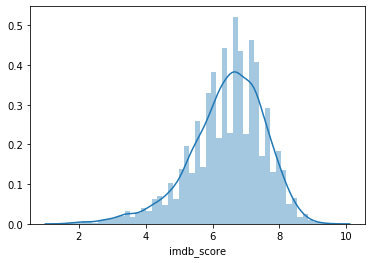

In [9]:
# distribution of IMDB score
sns.distplot(df.imdb_score)

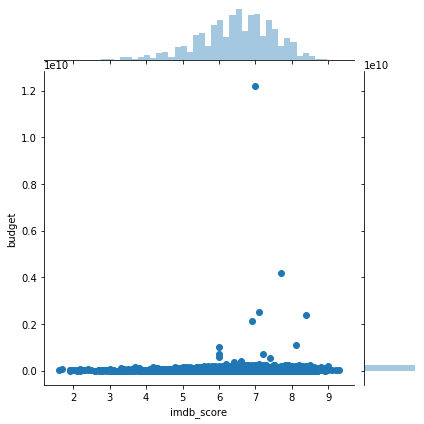

In [10]:
# IMDB score and budget are not strongly correlated
sns.jointplot(df.imdb_score, df.budget)

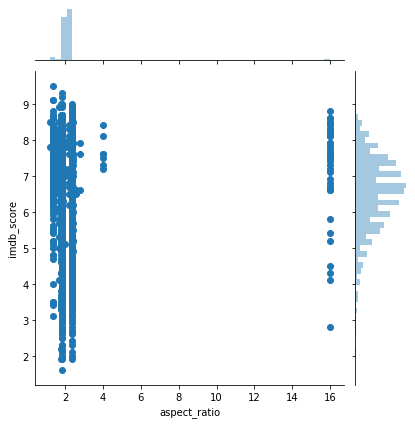

In [11]:
sns.jointplot(df.aspect_ratio, df.imdb_score)

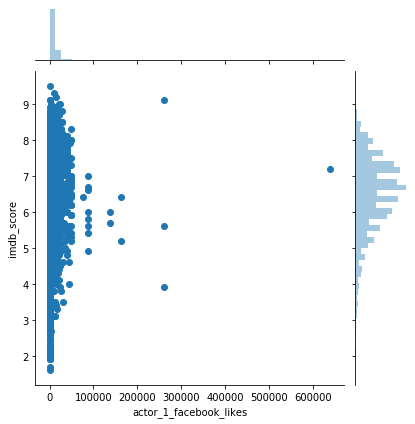

In [12]:
sns.jointplot(df.actor_1_facebook_likes, df.imdb_score)

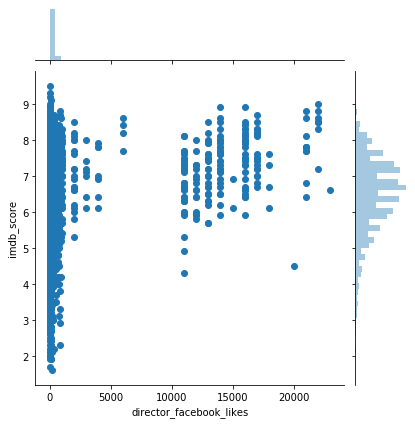

In [13]:
sns.jointplot(df.director_facebook_likes, df.imdb_score)

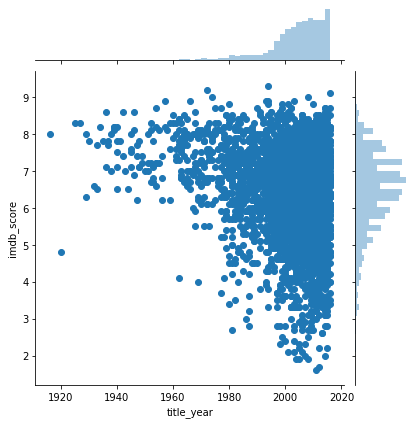

In [14]:
sns.jointplot(df.title_year, df.imdb_score)

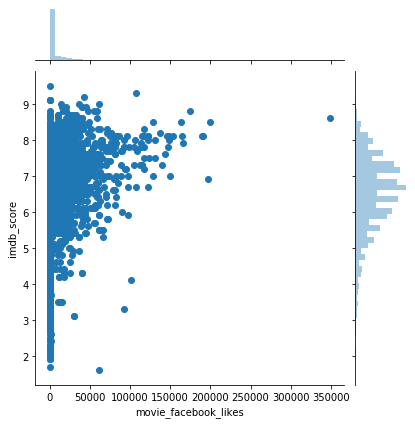

In [15]:
sns.jointplot(df.movie_facebook_likes, df.imdb_score)

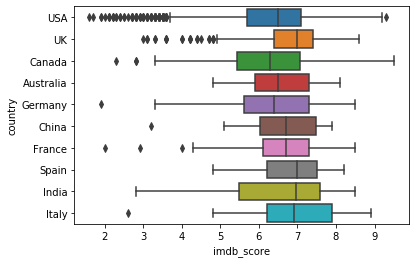

In [16]:
# IMDB score distribution by country
country_trimmed = list(df.groupby(['country']).size().nlargest(10).reset_index().iloc[:, 0])
sns.boxplot(data = df[df.country.isin(country_trimmed)], x='imdb_score', y='country')

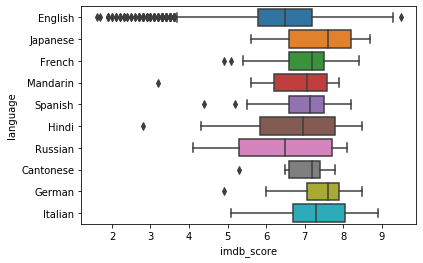

In [17]:
# IMDB distribution by language
language_trimmed = list(df.groupby(['language']).size().nlargest(10).reset_index().iloc[:, 0])
sns.boxplot(data = df[df.language.isin(language_trimmed)], x='imdb_score', y='language')

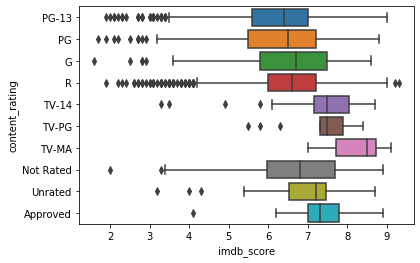

In [18]:
# IMDB distribution by content rating
ct_trimmed = list(df.groupby(['content_rating']).size().nlargest(10).reset_index().iloc[:, 0])
sns.boxplot(data = df[df.content_rating.isin(ct_trimmed)], x='imdb_score', y='content_rating')

# Feature Engineering

In [19]:
# check missing values
missing_data_count = df.isna().sum()
missing_data_percent = df.isna().sum() / len(df) * 100
missing_data_type = df.dtypes

missing_data = pd.DataFrame({
    'Count': missing_data_count,
    'Percent': missing_data_percent, 
    'Type': missing_data_type
    
})
missing_data = missing_data[missing_data.Count > 0]
missing_data.sort_values(by='Count', ascending=False, inplace=True)

print(f"There are {missing_data.shape[0]} features having missing data.\n")
missing_data

There are 21 features having missing data.



,Count,Percent,Type
gross,884,17.529248,float64
budget,492,9.756098,float64
aspect_ratio,329,6.523895,float64
content_rating,303,6.008328,object
plot_keywords,153,3.033908,object
title_year,108,2.141582,float64
director_name,104,2.062265,object
director_facebook_likes,104,2.062265,float64
num_critic_for_reviews,50,0.991473,float64
actor_3_name,23,0.456078,object


For features with missing or irrelevant values, I handle as follows: 
- Features that are not strongly relevant/hard to quantify with too many unique values: `movie_title`, `movie_imdb_link`, `director_name`,`actor_1_name`, `actor_2_name`, `actor_3_name`, `plot_keywords`): Drop completely (for director/actor names, we use number of facebook likes as proxy)

- Features with missing values of less than 2% (`actor_1_facebook_likes`, `country`): Drop missing rows

- Features with more missing values: 

a. Numeric (`gross`, `budget`, `aspect_ratio`, `director_facebook_likes`, `num_critic_for_reviews`, `actor_3_facebook_likes`, `duration`, `facenumber_in_poster`, `actor_2_facebook_likes`): Impute with mean 

b. Categorical (`content_rating`, `color`, `language`): Impute with the most frequent value 

In [20]:
# drop irrelevant features and missing rows
df = df.drop(['director_name', 'actor_1_name', 'actor_2_name', 
              'actor_3_name', 'plot_keywords', 'movie_title', 'movie_imdb_link'], axis=1)
df = df.dropna(subset=['actor_1_facebook_likes', 'country'])

# fill numeric columns with mean
df_num = df.select_dtypes(include=['int64', 'float64']).columns
df[df_num] = df[df_num].fillna(df[df_num].mean())

# fill categorical columns with most frequent values
df.language = df.language.fillna('English')
df.color = df.color.fillna('Color')
df.content_rating = df.content_rating.fillna('R')

# missing value - last check 
df.isna().sum()

color                        0
num_critic_for_reviews       0
duration                     0
director_facebook_likes      0
actor_3_facebook_likes       0
actor_1_facebook_likes       0
gross                        0
genres                       0
num_voted_users              0
cast_total_facebook_likes    0
facenumber_in_poster         0
num_user_for_reviews         0
language                     0
country                      0
content_rating               0
budget                       0
title_year                   0
actor_2_facebook_likes       0
imdb_score                   0
aspect_ratio                 0
movie_facebook_likes         0
dtype: int64

For `genres`, values are words connected by a `|`. I'll unpack these word strings into separate words and use One-hot Encoding to create new features from unique genres.

In [21]:
ws = []
for w in df.genres: 
    w = w.split('|')
    ws.append(w)
df.genres = ws
df.genres

0       [Action, Adventure, Fantasy, Sci-Fi]
1               [Action, Adventure, Fantasy]
2              [Action, Adventure, Thriller]
3                         [Action, Thriller]
5                [Action, Adventure, Sci-Fi]
                        ...                 
5038                         [Comedy, Drama]
5039       [Crime, Drama, Mystery, Thriller]
5040               [Drama, Horror, Thriller]
5041                [Comedy, Drama, Romance]
5042                           [Documentary]
Name: genres, Length: 5031, dtype: object

In [22]:
# one-hot encode and drop one class to avoid multi-colinearity 
df['Action'] = [1 if 'Action' in x else 0 for x in df.genres]
df['Adventure'] = [1 if 'Adventure' in x else 0 for x in df.genres]
df['Animation'] = [1 if 'Animation' in x else 0 for x in df.genres]
df['Biography'] = [1 if 'Biography' in x else 0 for x in df.genres]
df['Comedy'] = [1 if 'Comedy' in x else 0 for x in df.genres]
df['Crime'] = [1 if 'Crime' in x else 0 for x in df.genres]
df['Documentary'] = [1 if 'Documentary' in x else 0 for x in df.genres]
df['Drama'] = [1 if 'Drama' in x else 0 for x in df.genres]
df['Family'] = [1 if 'Family' in x else 0 for x in df.genres]
df['Fantasy'] = [1 if 'Fantasy' in x else 0 for x in df.genres]
df['Film-Noir'] = [1 if 'Film-Noir' in x else 0 for x in df.genres]
df['History'] = [1 if 'History' in x else 0 for x in df.genres]
df['Horror'] = [1 if 'Horrow' in x else 0 for x in df.genres]
df['Show'] = [1 if 'Game-Show' or 'Reality-TV' in x else 0 for x in df.genres]
df['Music'] = [1 if 'Musical' or 'Music' in x else 0 for x in df.genres]
df['Mystery'] = [1 if 'Mystery' in x else 0 for x in df.genres]
df['News'] = [1 if 'News' in x else 0 for x in df.genres]
df['Romance'] = [1 if 'Romance' in x else 0 for x in df.genres]
df['Sci-Fi'] = [1 if 'Sci-Fi' in x else 0 for x in df.genres]
df['Short'] = [1 if 'Short' in x else 0 for x in df.genres]
df['Sport'] = [1 if 'Sport' in x else 0 for x in df.genres]
df['Thriller'] = [1 if 'Thriller' in x else 0 for x in df.genres]
df['War'] = [1 if 'War' in x else 0 for x in df.genres]
df = df.drop('genres', axis=1)

In [23]:
# one-hot encode categorical variables
content_rating_encoded = pd.get_dummies(df['content_rating'], drop_first=True)
language_encoded = pd.get_dummies(df['language'], drop_first=True)
color_encoded = pd.get_dummies(df['color'], drop_first=True)
country_encoded = pd.get_dummies(df['country'], drop_first=True)
# update df 
df = df.drop(['content_rating', 'language', 'color', 'country'], axis=1)
new_df = pd.concat([df, content_rating_encoded, language_encoded, color_encoded, country_encoded], axis=1)
new_df.shape

(5031, 166)

As `imdb_score` and `num_voted_users` are not linearly correlated, a log transformation on `num_voted_users` can correct that. 

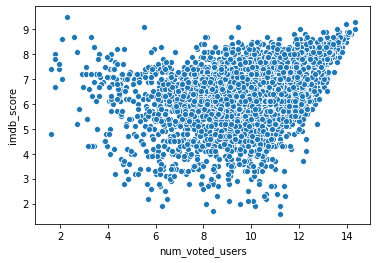

In [24]:
# scatter plot of log(num_voted_users) and imdb score (linear relationship)
sns.scatterplot(np.log(df.num_voted_users), df.imdb_score)

In [25]:
# log transform num_voted_users 
new_df['num_voted_users'] = np.log(new_df['num_voted_users'])

# Data split

In [26]:
# data split
X = new_df.drop(['imdb_score'], axis=1)
y = new_df['imdb_score'] 
X_train, X_dev, y_train, y_dev = train_test_split(X, y, test_size = 0.2, random_state=1)
X_dev, X_test, y_dev, y_test = train_test_split(X_dev, y_dev, test_size=0.5, random_state=2)

print(X_train.shape, X_dev.shape, X_test.shape, y_train.shape, y_dev.shape, y_test.shape)

(4024, 165) (503, 165) (504, 165) (4024,) (503,) (504,)


# Feature Selection

The data is now much better to run predictions on, but some from the pair correlation plot above, it can be seen that some features are not linearly correlated with `imdb_score` (violating one of the assumptions of Linear Regression) and common transformation methods don't work in these cases. I'll perform feature selection with LASSO.

In [27]:
from sklearn.feature_selection import SelectPercentile, SelectFromModel
from sklearn.linear_model import Lasso

# feature selection with LASSO
lasso = Lasso(alpha=0.001, max_iter=10000)
fs = SelectFromModel(estimator=lasso, threshold=0.001)
fs.fit(X_train, y_train)
fs.estimator_.coef_

array([ 1.58780225e-03,  2.30462357e-03,  1.99798233e-05,  6.03267465e-05,
        5.42114859e-05,  1.54576656e-09,  1.40113173e-01, -4.97350471e-05,
        3.45751214e-03,  1.33585396e-04, -6.47344244e-11, -2.16000879e-02,
        4.34505679e-05,  4.20943028e-02,  3.53708547e-06, -2.15166432e-01,
        3.87365276e-03,  4.88325745e-01,  1.69136393e-01, -8.68581772e-02,
        1.18288836e-01,  1.39665455e+00,  5.66763927e-01, -8.77910157e-03,
       -1.44915782e-01,  0.00000000e+00,  2.20113059e-02,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00, -1.23246709e-02,  0.00000000e+00,
       -6.40832636e-02, -1.35145138e-01,  0.00000000e+00,  7.24310828e-02,
       -2.24621265e-01,  0.00000000e+00, -1.33909986e-01,  0.00000000e+00,
       -0.00000000e+00, -0.00000000e+00, -0.00000000e+00, -1.35595320e-01,
       -2.22727686e-01, -0.00000000e+00,  7.24036177e-02,  6.04286441e-01,
        7.19957473e-01,  1.18682611e+00,  8.66312181e-01,  0.00000000e+00,
        0.00000000e+00,  

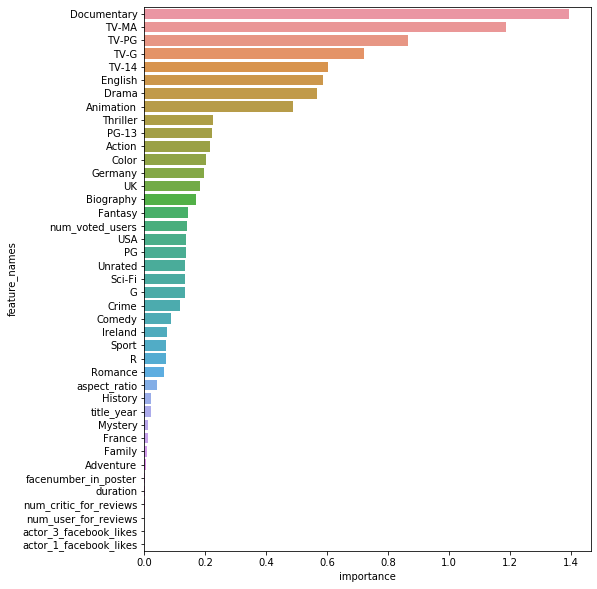

In [28]:
# plot feature importance
importance = np.abs(fs.estimator_.coef_)
feature_names = np.array(X_train.columns)
imp = pd.DataFrame({'feature_names':feature_names, 'importance':importance}).sort_values(by='importance', 
                                                                                           ascending=False)
plt.figure(figsize=(8,10))
sns.barplot(x=imp.importance[:41], y=imp.feature_names[:41])

In [29]:
# reduce training set to 28 selected features
X_train_reduced = fs.transform(X_train)
print(X_train_reduced.shape)

# reduce dev set to selected features
X_dev_reduced = fs.transform(X_dev)
X_test_reduced = fs.transform(X_test)

(4024, 38)


# Modeling

After selecting the best features to be used in modeling, I use Elastic Net (a combination of Ridge and LASSO regression) for training and hyperparameter tuning (alpha - equivalent to lambda the regularization term for L1 and L2 penalty). l1_ratio is set to default 0.5 (use L1 and L2 penalty equally).

In [30]:
# Elastic Net
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_squared_error
elastic = ElasticNet(alpha=0.0001, l1_ratio=0.5, max_iter=10000)
elastic.fit(X_train_reduced, y_train)
y_dev_pred = elastic.predict(X_dev_reduced)
rmse = mean_squared_error(y_dev, y_dev_pred)
rmse

0.5952910778427482

Hyperparameter tuning is performed by testing the RMSE of train and dev sets with alpha values in `alpha_list`. 

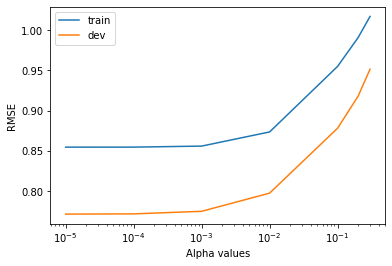

The best dev Root Mean Squared Error is 0.7712440544964425 with alpha = 1e-05


In [31]:
# set up alpha list and train/dev RMSE lists
alpha_list = [0.00001, 0.0001, 0.001, 0.01, 0.1, 0.2, 0.3]
train_rmse = []
dev_rmse = []

# train and predict with each alpha valu
for alpha in alpha_list:
    elastic = ElasticNet(alpha=alpha, l1_ratio=0.5, max_iter=10000)
    elastic.fit(X_train_reduced, y_train)
    y_train_pred = elastic.predict(X_train_reduced)
    y_dev_pred = elastic.predict(X_dev_reduced)
    train_rmse.append(np.sqrt(mean_squared_error(y_train, y_train_pred)))
    dev_rmse.append(np.sqrt(mean_squared_error(y_dev, y_dev_pred)))
    
# plot results
plt.semilogx(alpha_list, train_rmse, alpha_list, dev_rmse)
plt.legend(("train", "dev"))
plt.xlabel("Alpha values")
plt.ylabel("RMSE")
plt.show()

best_rmse = dev_rmse[dev_rmse.index(min(dev_rmse))]
best_alpha = alpha_list[dev_rmse.index(min(dev_rmse))]

print("The best dev Root Mean Squared Error is {} with alpha = {}".format(best_rmse, best_alpha))    

### Comparing 3 models on test set

In [32]:
# ElasticNet RMSE
import time
print("ELASTIC NET")
start = time.time()

elastic = ElasticNet(alpha=0.00001, max_iter=10000)
elastic.fit(X_train_reduced, y_train)
y_test_elastic = elastic.predict(X_test_reduced)

end = time.time()
print("Time:", end - start)
print("RMSE: {}".format(np.sqrt(mean_squared_error(y_test, y_test_elastic))))

ELASTIC NET
Time: 0.018950939178466797
RMSE: 0.7622406669996418


In [33]:
# LASSO Regression RMSE 
print("LASSO")
start = time.time()

lasso = Lasso(alpha=0.00001, max_iter=10000)
lasso.fit(X_train_reduced, y_train)
y_test_lasso = lasso.predict(X_test_reduced)

end = time.time()
print("Time:", end - start)
print("RMSE: {}".format(np.sqrt(mean_squared_error(y_test, y_test_lasso))))

LASSO
Time: 0.01894664764404297
RMSE: 0.7622405811314074


In [34]:
# Rigde Regression RMSE
from sklearn.linear_model import Ridge

print("RIDGE")
start = time.time()

ridge = Ridge(alpha = 0.0001, max_iter=10000)
ridge.fit(X_train_reduced, y_train)
y_test_ridge = ridge.predict(X_test_reduced)

end = time.time()
print("Time:", end - start)
print("RMSE: {}".format(np.sqrt(mean_squared_error(y_test, y_test_ridge))))

RIDGE
Time: 0.003992319107055664
RMSE: 0.7622769319375126


All 3 regression models got almost equal predictive performance on test set but RMSE but Ridge is the fastest one to train. Let's evaluate the model by checking R-squared value and if residuals are normally distributed.

In [35]:
c = pd.DataFrame({'y_test':y_test, 'y_test_ridge':y_test_ridge, 'resid': y_test-y_test_ridge})
c

,y_test,y_test_ridge,resid
1798,5.3,5.970430,-0.670430
2742,5.6,5.961955,-0.361955
4135,7.4,6.529295,0.870705
3761,5.3,5.607801,-0.307801
3844,7.2,7.040783,0.159217
...,...,...,...
575,7.4,7.064707,0.335293
1149,7.0,6.762541,0.237459
3946,5.9,5.681617,0.218383
4877,6.2,5.482931,0.717069


In [36]:
# check R-squared on train and test set
print(ridge.score(X_train_reduced, y_train))
print(ridge.score(X_test_reduced, y_test))

0.4347977439202311
0.4803848325877066


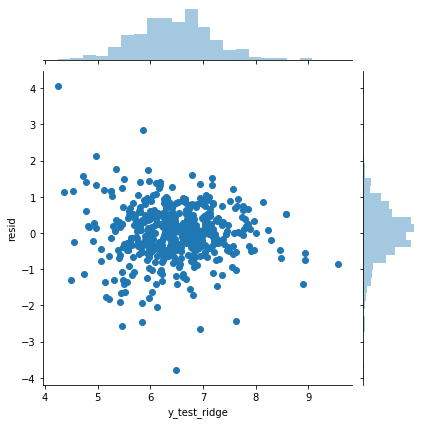

In [37]:
# plot residuals against fitted values
sns.jointplot(c.y_test_ridge, c.resid)

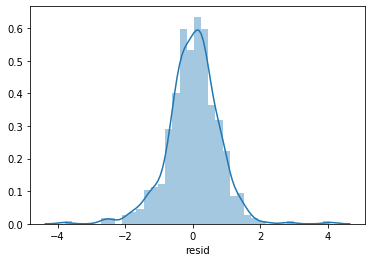

In [39]:
# plot residual distribution
sns.distplot(c.resid)

So the R-squared on test data is 0.48, meaning that the model explains 48% variance in IMDB score. The residual plots show that residuals of predictions follow an asymptotic normal distribution with mean 0 and constant variance across all predicted values, meeting regression assumption on residuals. 

# Conclusion
From the predictive results above, it can be seen that all models perform equally well on test set but Ridge gives a much shorter training time (about 10x faster than the other two). **I'd recommend deploying with the Ridge Regression model.**